# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
import re

from datetime import datetime

%matplotlib inline

# Read into Python

In [2]:
#load dataset
df = pd.read_csv('/Users/madhukumar/Desktop/Portfolio/github/glassdoor-sentiment/data/employee_reviews_clean.csv')
df.head(5)

,Unnamed: 0,rating,full_review,clean_review,year,day,month,country,anonymity,employee_type
0,0,5.0,Best Company to work for. People are smart and...,best company to work for people are smart and ...,2018.0,Tuesday,12.0,none,1.0,1
1,1,4.0,"Moving at the speed of light, burn out is inev...",moving at the speed of light burn out is inevi...,2013.0,Friday,6.0,United States of America,2.0,2
2,2,5.0,Great balance between big-company security and...,great balance between bigcompany security and ...,2014.0,Saturday,5.0,United States of America,2.0,1
3,3,5.0,The best place I've worked and also the most d...,the best place ive worked and also the most de...,2015.0,Sunday,2.0,United States of America,1.0,1
4,4,5.0,"Unique, one of a kind dream job. Google is a w...",unique one of a kind dream job google is a wor...,2018.0,Thursday,7.0,United States of America,2.0,2


In [3]:
#removing unwanted columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df['word_count'] = df['clean_review'].apply(lambda x: len(str(x).split()))

In [5]:
df.describe()

,rating,year,month,anonymity,employee_type,word_count
count,66935.000000,66931.000000,66931.000000,66935.000000,66935.000000,66935.000000
mean,3.825024,2015.427395,6.667523,1.600284,1.369538,68.847016
std,1.155692,2.388546,3.379884,0.489844,0.482683,88.908980
min,1.000000,2008.000000,1.000000,1.000000,1.000000,6.000000
25%,3.000000,2014.000000,4.000000,1.000000,1.000000,22.000000
50%,4.000000,2016.000000,7.000000,2.000000,1.000000,42.000000
75%,5.000000,2017.000000,10.000000,2.000000,2.000000,81.000000
max,5.000000,2018.000000,12.000000,2.000000,2.000000,3606.000000


# Comparing Sentiment Detection Tools: TextBlob and NLTK (Vader)

In [6]:
def detect_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [7]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
df['textblob_sentiment'] = df['full_review'].apply(detect_sentiment)

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound= []

for review in df['full_review']:
    sent = sia.polarity_scores(str(review))
    
    compound.append(sent['compound'])
    
df['nltk_sentiment'] = compound

In [9]:
df.head()

,rating,full_review,clean_review,year,day,month,country,anonymity,employee_type,word_count,textblob_sentiment,nltk_sentiment
0,5.0,Best Company to work for. People are smart and...,best company to work for people are smart and ...,2018.0,Tuesday,12.0,none,1.0,1,16,0.358433,0.8779
1,4.0,"Moving at the speed of light, burn out is inev...",moving at the speed of light burn out is inevi...,2013.0,Friday,6.0,United States of America,2.0,2,708,0.151979,0.9983
2,5.0,Great balance between big-company security and...,great balance between bigcompany security and ...,2014.0,Saturday,5.0,United States of America,2.0,1,805,0.133697,0.9988
3,5.0,The best place I've worked and also the most d...,the best place ive worked and also the most de...,2015.0,Sunday,2.0,United States of America,1.0,1,836,0.172253,0.9994
4,5.0,"Unique, one of a kind dream job. Google is a w...",unique one of a kind dream job google is a wor...,2018.0,Thursday,7.0,United States of America,2.0,2,2281,0.159729,0.9998


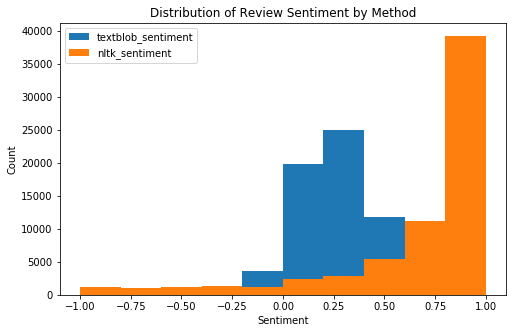

In [10]:
df[['textblob_sentiment', 'nltk_sentiment']].plot(kind='hist', bins=10, title='Distribution of Review Sentiment by Method',
                                  figsize=(8, 5), style={'textblob_sentiment': 'r', 'nltk_sentiment':'g'});
plt.xlabel('Sentiment');
plt.ylabel('Count');

Choosing NLTK tool over TextBlob because it has a wider distribution

In [11]:
def label(i):
    if i < 0:
        return "negative"
    if i == 0:
        return "neutral"
    if i > 0:
        return "positive"
    
df['label'] = df['nltk_sentiment'].apply(label)

In [12]:
df['class'] = df.label.map({'positive':1, 'negative':0, 'neutral':2})

In [13]:
df.head()

,rating,full_review,clean_review,year,day,month,country,anonymity,employee_type,word_count,textblob_sentiment,nltk_sentiment,label,class
0,5.0,Best Company to work for. People are smart and...,best company to work for people are smart and ...,2018.0,Tuesday,12.0,none,1.0,1,16,0.358433,0.8779,positive,1
1,4.0,"Moving at the speed of light, burn out is inev...",moving at the speed of light burn out is inevi...,2013.0,Friday,6.0,United States of America,2.0,2,708,0.151979,0.9983,positive,1
2,5.0,Great balance between big-company security and...,great balance between bigcompany security and ...,2014.0,Saturday,5.0,United States of America,2.0,1,805,0.133697,0.9988,positive,1
3,5.0,The best place I've worked and also the most d...,the best place ive worked and also the most de...,2015.0,Sunday,2.0,United States of America,1.0,1,836,0.172253,0.9994,positive,1
4,5.0,"Unique, one of a kind dream job. Google is a w...",unique one of a kind dream job google is a wor...,2018.0,Thursday,7.0,United States of America,2.0,2,2281,0.159729,0.9998,positive,1


In [14]:
df['class'].value_counts()

1    60499
0     5811
2      625
Name: class, dtype: int64

In [15]:
df.groupby('year').full_review.count()

year
2008.0     1365
2009.0      929
2010.0     1130
2011.0     1710
2012.0     3204
2013.0     3855
2014.0     5934
2015.0    10103
2016.0    11372
2017.0    13878
2018.0    13451
Name: full_review, dtype: int64

# Feature Selection from categorical variables

In [16]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [17]:
table = df[['class', 'employee_type']]
stat, p, dof, expected = chi2_contingency(table)

prob = 0.95

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret test-statistic
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
probability=0.950, critical=67536.954, stat=10455.242
Independent (fail to reject H0)


In [18]:
table = df[['class', 'month']]

stat, p, dof, expected = chi2_contingency(table)

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
probability=0.950, critical=67536.954, stat=nan
Independent (fail to reject H0)


/Users/madhukumar/anaconda3/lib/python3.7/site-packages/scipy/stats/contingency.py:244: RuntimeWarning: invalid value encountered in less
  if np.any(observed < 0):


In [19]:
table = df[['class', 'year']]

stat, p, dof, expected = chi2_contingency(table)

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
probability=0.950, critical=67536.954, stat=nan
Independent (fail to reject H0)


In [20]:
table = df[['class', 'anonymity']]

stat, p, dof, expected = chi2_contingency(table)

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
probability=0.950, critical=67536.954, stat=10169.561
Independent (fail to reject H0)


In [21]:
table = df[['class', 'employee_type']]

stat, p, dof, expected = chi2_contingency(table)

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
probability=0.950, critical=67536.954, stat=10455.242
Independent (fail to reject H0)


In [22]:
table = df[['class', 'rating']]

stat, p, dof, expected = chi2_contingency(table)

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
probability=0.950, critical=67536.954, stat=10222.412
Independent (fail to reject H0)


In [23]:
df['day_class'] = df.day.map({'Monday':1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                                       'Friday': 5, 'Saturday': 6, 'Sunday': 7})

table = df[['class', 'day_class']]

stat, p, dof, expected = chi2_contingency(table)

# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
probability=0.950, critical=67536.954, stat=nan
Independent (fail to reject H0)


In [24]:
df.head()

,rating,full_review,clean_review,year,day,month,country,anonymity,employee_type,word_count,textblob_sentiment,nltk_sentiment,label,class,day_class
0,5.0,Best Company to work for. People are smart and...,best company to work for people are smart and ...,2018.0,Tuesday,12.0,none,1.0,1,16,0.358433,0.8779,positive,1,2.0
1,4.0,"Moving at the speed of light, burn out is inev...",moving at the speed of light burn out is inevi...,2013.0,Friday,6.0,United States of America,2.0,2,708,0.151979,0.9983,positive,1,5.0
2,5.0,Great balance between big-company security and...,great balance between bigcompany security and ...,2014.0,Saturday,5.0,United States of America,2.0,1,805,0.133697,0.9988,positive,1,6.0
3,5.0,The best place I've worked and also the most d...,the best place ive worked and also the most de...,2015.0,Sunday,2.0,United States of America,1.0,1,836,0.172253,0.9994,positive,1,7.0
4,5.0,"Unique, one of a kind dream job. Google is a w...",unique one of a kind dream job google is a wor...,2018.0,Thursday,7.0,United States of America,2.0,2,2281,0.159729,0.9998,positive,1,4.0


# Export Dataframe

In [25]:
df.drop(['textblob_sentiment', 'nltk_sentiment', 'month', 
         'year', 'employee_type', 'day', 'day_class', 'anonymity', 'rating'], axis=1, inplace=True)
df.head()

,full_review,clean_review,country,word_count,label,class
0,Best Company to work for. People are smart and...,best company to work for people are smart and ...,none,16,positive,1
1,"Moving at the speed of light, burn out is inev...",moving at the speed of light burn out is inevi...,United States of America,708,positive,1
2,Great balance between big-company security and...,great balance between bigcompany security and ...,United States of America,805,positive,1
3,The best place I've worked and also the most d...,the best place ive worked and also the most de...,United States of America,836,positive,1
4,"Unique, one of a kind dream job. Google is a w...",unique one of a kind dream job google is a wor...,United States of America,2281,positive,1


In [26]:
df.to_csv("/Users/madhukumar/Desktop/Portfolio/github/glassdoor-sentiment/data/employee_reviews_with_features.csv")
df.head()

,full_review,clean_review,country,word_count,label,class
0,Best Company to work for. People are smart and...,best company to work for people are smart and ...,none,16,positive,1
1,"Moving at the speed of light, burn out is inev...",moving at the speed of light burn out is inevi...,United States of America,708,positive,1
2,Great balance between big-company security and...,great balance between bigcompany security and ...,United States of America,805,positive,1
3,The best place I've worked and also the most d...,the best place ive worked and also the most de...,United States of America,836,positive,1
4,"Unique, one of a kind dream job. Google is a w...",unique one of a kind dream job google is a wor...,United States of America,2281,positive,1
